# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Import Data

In [2]:
scholarship=pd.read_csv('dataset_combined.csv')
scholarship.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,1
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
3,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In,1
4,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In,1


# EDA

In [3]:
scholarship.describe()

,Outcome
count,245760.000000
mean,0.133333
std,0.339935
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Info

In [4]:
scholarship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245760 entries, 0 to 245759
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     245760 non-null  object
 1   Education Qualification  245760 non-null  object
 2   Gender                   245760 non-null  object
 3   Community                245760 non-null  object
 4   Religion                 245760 non-null  object
 5   Exservice-men            245760 non-null  object
 6   Disability               245760 non-null  object
 7   Sports                   245760 non-null  object
 8   Annual-Percentage        245760 non-null  object
 9   Income                   245760 non-null  object
 10  India                    245760 non-null  object
 11  Outcome                  245760 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 22.5+ MB


# Columns

In [5]:
scholarship.columns

Index(['Name', 'Education Qualification', 'Gender', 'Community', 'Religion',
       'Exservice-men', 'Disability', 'Sports', 'Annual-Percentage', 'Income',
       'India', 'Outcome'],
      dtype='object')

# Counts Values

In [6]:
for col in scholarship.columns:
    print( scholarship[col].value_counts() )


Name
INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)                 24576
Abdul Kalam Technology Innovation National Fellowship                                24576
AAI Sports Scholarship Scheme in India 2022-23                                       24576
Glow and lovely Career Foundation Scholarship                                        24576
National Fellowship for Persons with Disabilities                                    24576
ONGC Sports Scholarship Scheme 2022-23                                               24576
Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child                         24576
Dr. Ambedkar post matric Scholarship                                                 24576
Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes    24576
National Overseas Scholarship Scheme 2021-22                                         24576
Name: count, dtype: int64
Education Qualification
Undergraduate    81920
Postgraduate

# Relationship between Scholarship Program Name & Scholarship

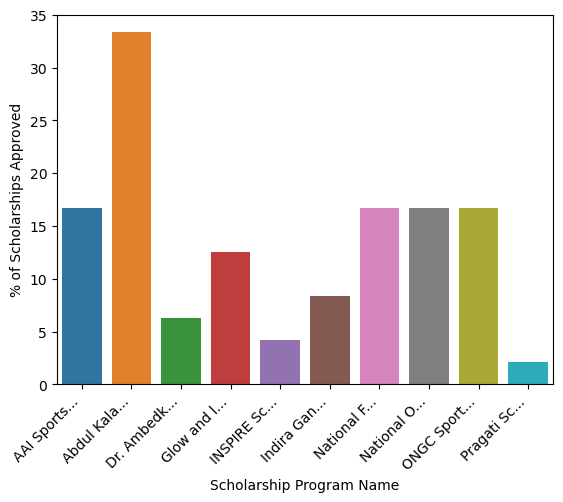

In [7]:

def get_graph_data(scholarship, feature_col):
    # Group by the specified feature column and Outcome, then count occurrences
    grouped_data = scholarship.groupby([feature_col, 'Outcome']).size().reset_index(name='Count')

    # Pivot the table to create a DataFrame with Outcome=0 and Outcome=1 as columns
    df = pd.pivot_table(grouped_data, values='Count', index=feature_col, columns='Outcome', fill_value=0)

    # Calculate the total count of outcomes for each feature value
    df['Outcome_Total'] = df.sum(axis=1)

    # Calculate the percentage of Outcome=0 and Outcome=1 relative to the total count
    df['Outcome=0 %'] = (df[0] / df['Outcome_Total']) * 100
    df['Outcome=1 %'] = (df[1] / df['Outcome_Total']) * 100

    return df.reset_index()

df_name = get_graph_data(scholarship, "Name")
df_name["Name_fmt"] = df_name["Name"].apply(lambda x: x[0:10] + "...")
ax = sns.barplot(data=df_name, x="Name_fmt", y="Outcome=1 %")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Scholarship Program Name")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Education Qualification & Scholarship

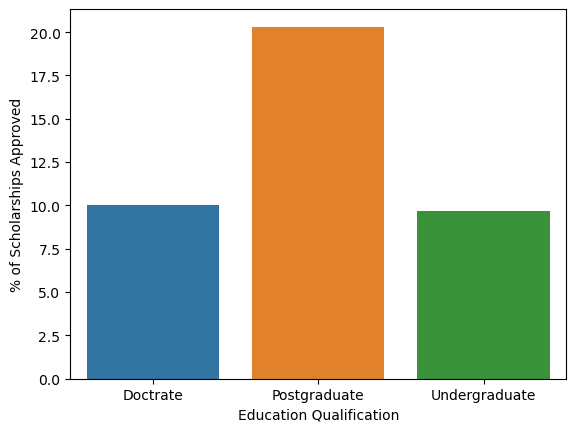

In [8]:
df_education = get_graph_data(scholarship, "Education Qualification")
ax = sns.barplot(data=df_education, x="Education Qualification", y="Outcome=1 %")
plt.xlabel("Education Qualification")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Gender & Scholarship

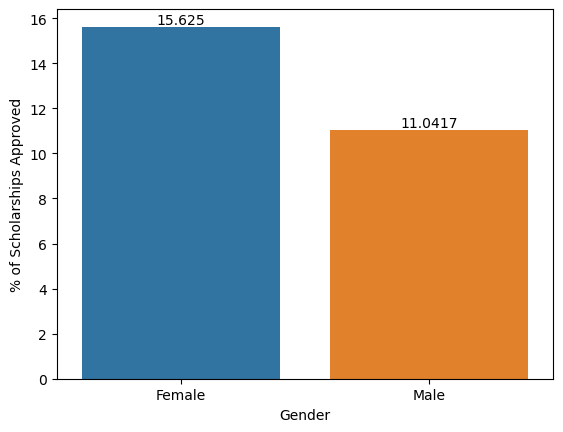

In [9]:
df_gender = get_graph_data(scholarship, "Gender")
ax = sns.barplot(data=df_gender, x="Gender", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Gender")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Community & Scholarship

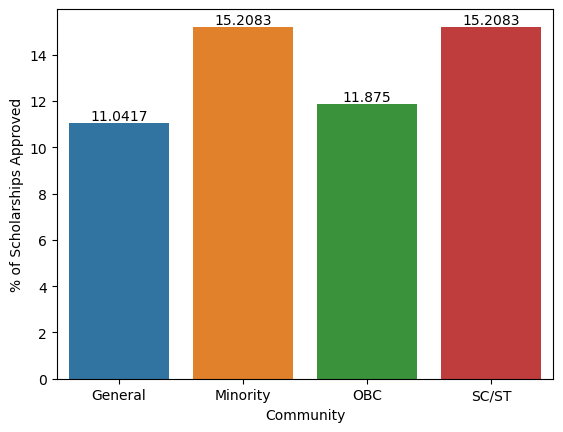

In [10]:
df_community = get_graph_data(scholarship, "Community")
df_community
ax = sns.barplot(data=df_community, x="Community", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Community")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Religion & Scholarship

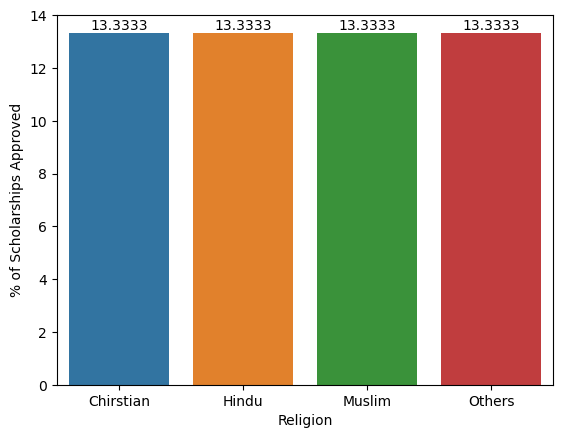

In [11]:
df_community = get_graph_data(scholarship, "Religion")
ax = sns.barplot(data=df_community, x="Religion", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Religion")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Exservice-man & Scholarship

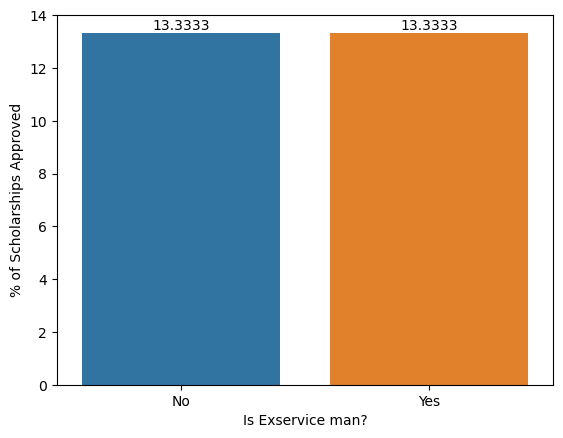

In [12]:
df_community = get_graph_data(scholarship, "Exservice-men")
ax = sns.barplot(data=df_community, x="Exservice-men", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Exservice man?")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Disability & Scholarship

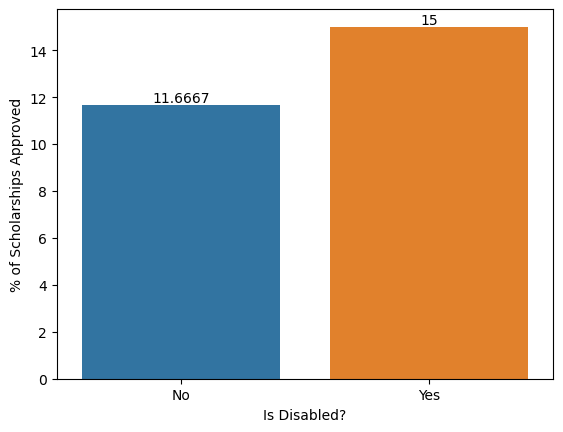

In [13]:
df_community = get_graph_data(scholarship, "Disability")
ax = sns.barplot(data=df_community, x="Disability", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Disabled?")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Sports & Scholarship

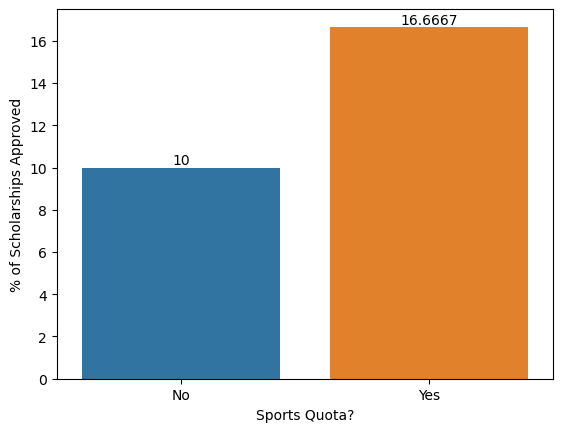

In [14]:
df_community = get_graph_data(scholarship, "Sports")
ax = sns.barplot(data=df_community, x="Sports", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Sports Quota?")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Annual Percentage & Scholarship

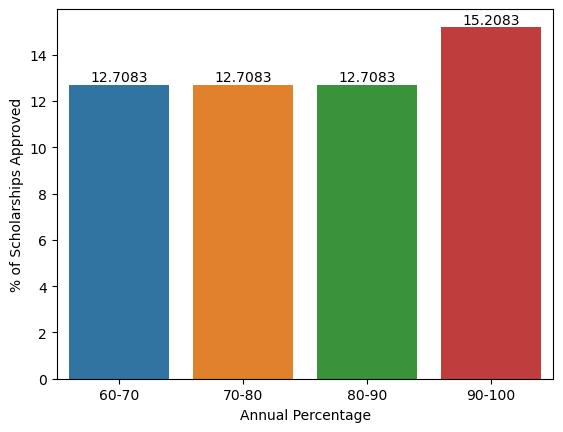

In [15]:
df_community = get_graph_data(scholarship, "Annual-Percentage")
df_community
ax = sns.barplot(data=df_community, x="Annual-Percentage", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Annual Percentage")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Income & Scholarship

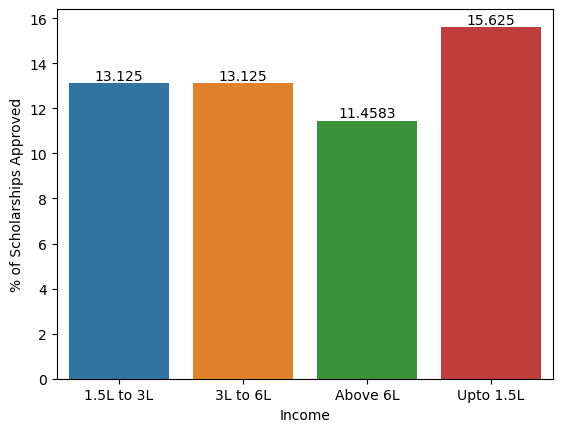

In [16]:
df_community = get_graph_data(scholarship, "Income")
ax = sns.barplot(data=df_community, x="Income", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Income")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Relationship between Location & Scholarship

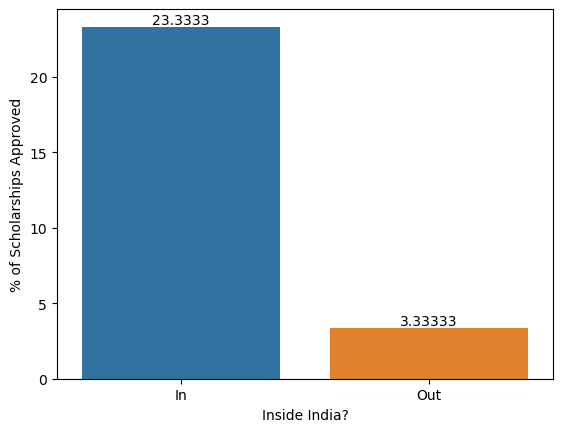

In [17]:
df_community = get_graph_data(scholarship, "India")
ax = sns.barplot(data=df_community, x="India", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Inside India?")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Cleaning Data

In [18]:
scholarship_drop = scholarship.drop(["Name", "Religion", "Exservice-men"], axis=1)
scholarship_drop

,Education Qualification,Gender,Community,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,Undergraduate,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
1,Undergraduate,Male,General,Yes,No,90-100,Upto 1.5L,In,1
2,Undergraduate,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
3,Undergraduate,Male,General,Yes,No,90-100,Upto 1.5L,In,1
4,Undergraduate,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
...,...,...,...,...,...,...,...,...,...
245755,Doctrate,Female,Minority,No,No,60-70,Above 6L,Out,1
245756,Doctrate,Female,Minority,No,Yes,60-70,Above 6L,Out,1
245757,Doctrate,Female,Minority,No,No,60-70,Above 6L,Out,1
245758,Doctrate,Female,Minority,No,Yes,60-70,Above 6L,Out,1


# Encoding of Education Qualification

In [19]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Education Qualification']= label_encoder.fit_transform(scholarship_drop['Education Qualification']) 
scholarship_drop['Education Qualification'].unique() 
scholarship_drop

,Education Qualification,Gender,Community,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,2,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
1,2,Male,General,Yes,No,90-100,Upto 1.5L,In,1
2,2,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
3,2,Male,General,Yes,No,90-100,Upto 1.5L,In,1
4,2,Male,General,Yes,Yes,90-100,Upto 1.5L,In,1
...,...,...,...,...,...,...,...,...,...
245755,0,Female,Minority,No,No,60-70,Above 6L,Out,1
245756,0,Female,Minority,No,Yes,60-70,Above 6L,Out,1
245757,0,Female,Minority,No,No,60-70,Above 6L,Out,1
245758,0,Female,Minority,No,Yes,60-70,Above 6L,Out,1


# Encoding of Annual-Percentage


In [20]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Annual-Percentage']= label_encoder.fit_transform(scholarship_drop['Annual-Percentage']) 
scholarship_drop['Annual-Percentage'].unique() 


array([3, 2, 1, 0])

# Encoding of Income

In [21]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Income']= label_encoder.fit_transform(scholarship_drop['Income']) 
scholarship_drop['Income'].unique() 

array([3, 0, 1, 2])

# Encoding of Gender

In [22]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Gender']= label_encoder.fit_transform(scholarship_drop['Gender']) 
scholarship_drop['Gender'].unique() 

array([1, 0])

# Encoding of Community

In [23]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Community']= label_encoder.fit_transform(scholarship_drop['Community']) 
scholarship_drop['Community'].unique() 

array([0, 2, 3, 1])

# Encoding of Disability

In [24]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Disability']= label_encoder.fit_transform(scholarship_drop['Disability']) 
scholarship_drop['Disability'].unique() 

array([1, 0])

# Encoding of Sports

In [25]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['Sports']= label_encoder.fit_transform(scholarship_drop['Sports']) 
scholarship_drop['Sports'].unique() 

array([1, 0])

# Encoding of India

In [26]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder() 
scholarship_drop['India']= label_encoder.fit_transform(scholarship_drop['India']) 
scholarship_drop['India'].unique() 

array([0, 1])

In [27]:
scholarship_drop

,Education Qualification,Gender,Community,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,2,1,0,1,1,3,3,0,1
1,2,1,0,1,0,3,3,0,1
2,2,1,0,1,1,3,3,0,1
3,2,1,0,1,0,3,3,0,1
4,2,1,0,1,1,3,3,0,1
...,...,...,...,...,...,...,...,...,...
245755,0,0,1,0,0,0,2,1,1
245756,0,0,1,0,1,0,2,1,1
245757,0,0,1,0,0,0,2,1,1
245758,0,0,1,0,1,0,2,1,1


# Correlation

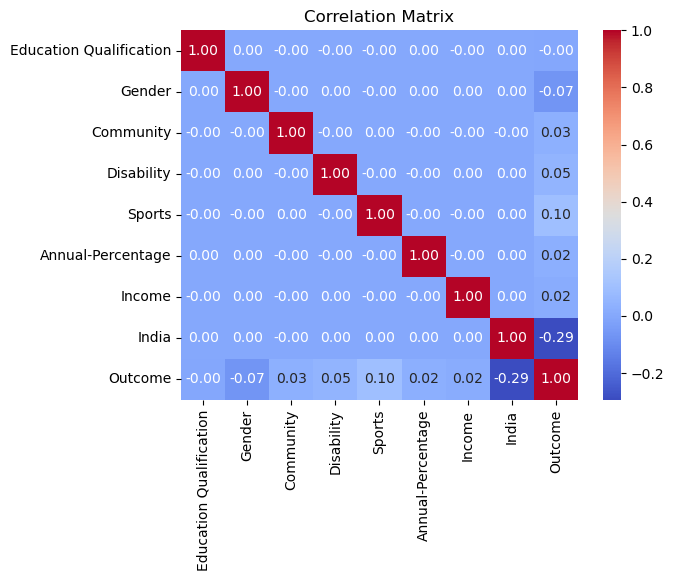

In [28]:
correlation_matrix = scholarship_drop.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Slice

In [29]:
X=scholarship_drop[['Education Qualification','Gender','Community','Disability','Sports','Income','India']]
y=scholarship_drop['Outcome']

# Splitting data into training set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Implement Decision tree Criterion as entropy

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Using criterion='entropy'
classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)  
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)

print("Metrics for Entropy:")
print("Accuracy:", accuracy_entropy*100)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1 Score:", f1_entropy)


Metrics for Entropy:
Accuracy: 87.04264322916667
Precision: 0.5728813559322034
Recall: 0.12337267307458329
F1 Score: 0.20302332565822404


# Implement Decision tree Criterion as gini

In [40]:
# Using criterion='gini'
classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier_gini.fit(X_train, y_train)
y_pred_gini = classifier_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini) 
recall_gini = recall_score(y_test, y_pred_gini)
f1_gini = f1_score(y_test, y_pred_gini)

print("\nMetrics for Gini:")
print("Accuracy:", accuracy_gini*100)
print("Precision:", precision_gini)
print("Recall:", recall_gini)
print("F1 Score:", f1_gini)



Metrics for Gini:
Accuracy: 87.04264322916667
Precision: 0.5728813559322034
Recall: 0.12337267307458329
F1 Score: 0.20302332565822404


In [41]:
y_pred= classifier_entropy.predict(X_test)

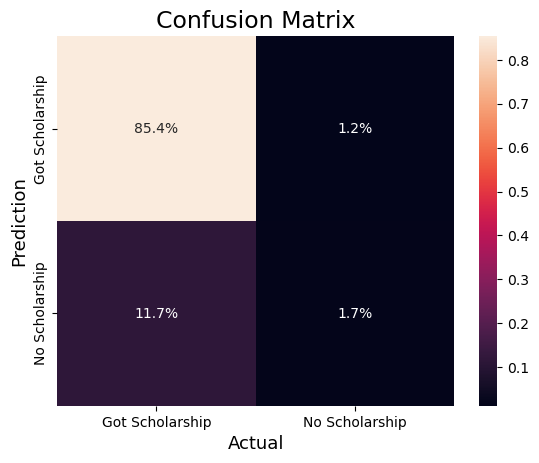

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm = cm / sum(sum(cm))

sns.heatmap(cm,annot=True,fmt=".1%",
            xticklabels=["Got Scholarship","No Scholarship"],
            yticklabels=["Got Scholarship","No Scholarship"])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

|--- feature_6 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0


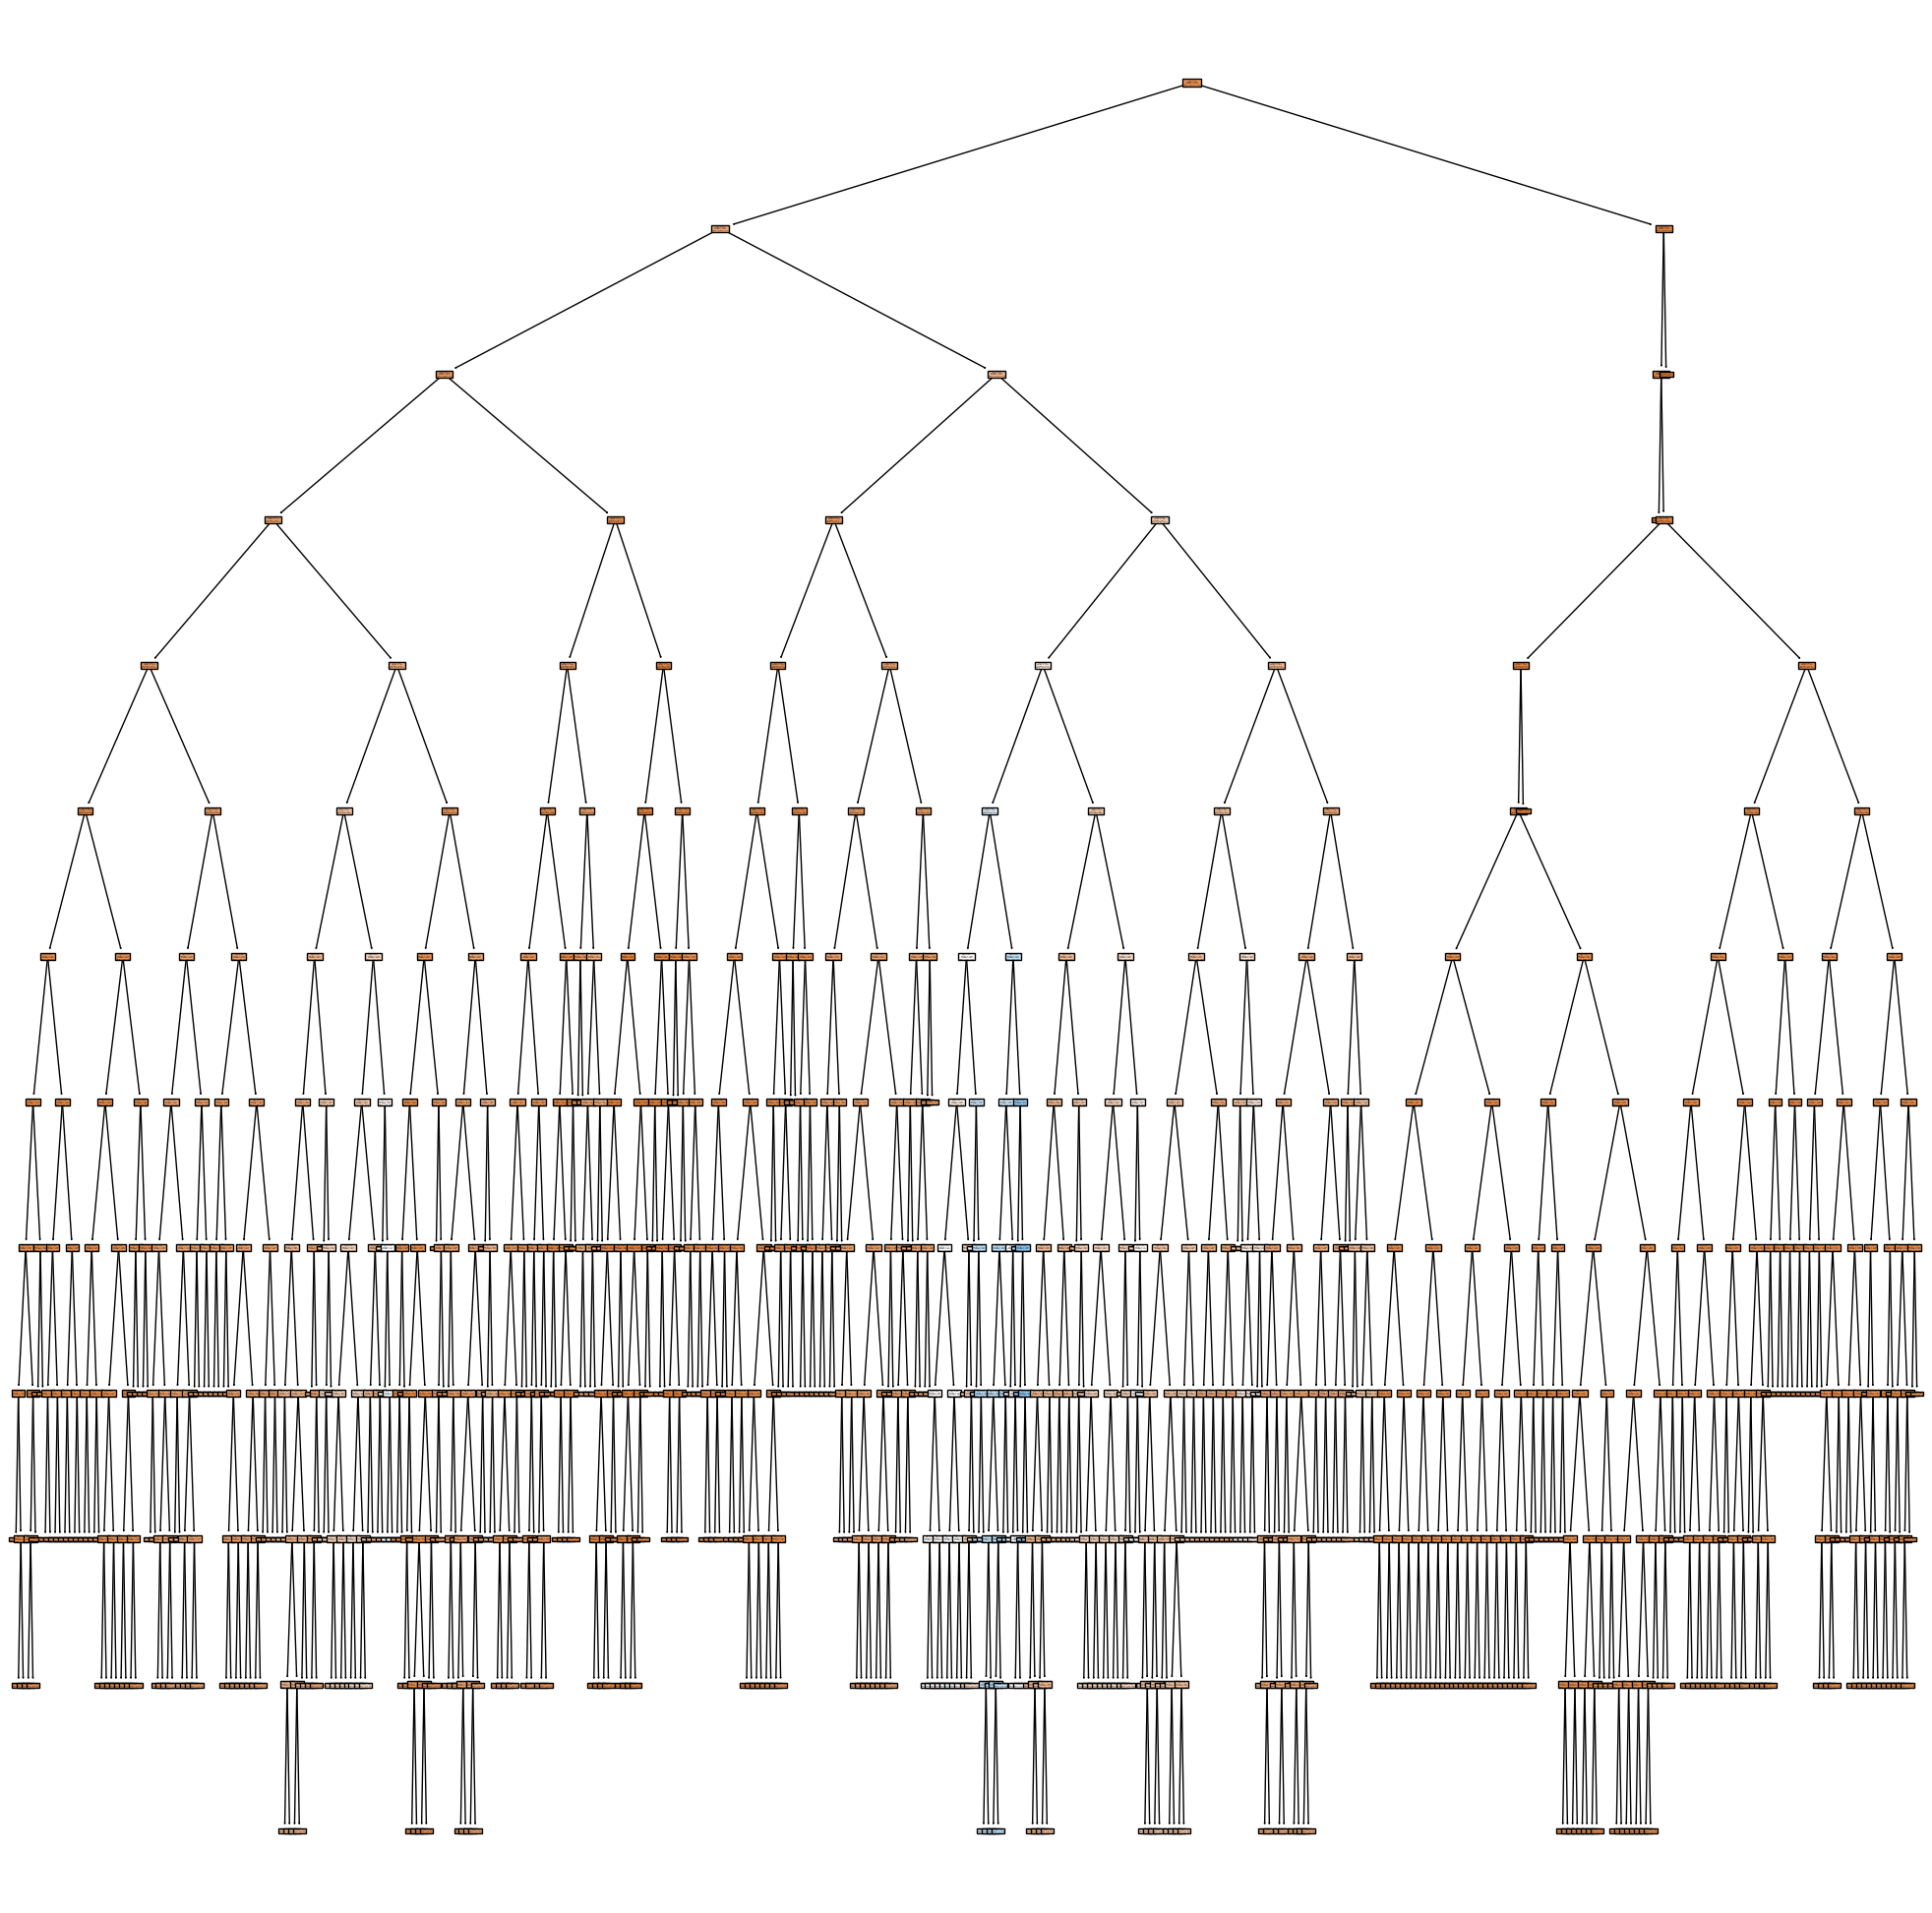

In [43]:
from sklearn import tree


plt.figure(figsize=(25,25))
tree.plot_tree(classifier_entropy,filled=True)


print(tree.export_text(classifier_entropy))
